In [1]:
import pandas as pd 

In [4]:
#Open CSV file
with open("adult.csv", "r+") as f:
    #Open file which has header
    with open("name.csv",'r') as fh:
        #Read header
        header = fh.read()
        #Read complete data of CSV file
        old = f.read()
        #Get cursor to start of file
        f.seek(0)
        #Write header and old data to file.
        f.write(header+ "\n" + old)

In [5]:
filename = "adult.csv"
df = pd.read_csv('adult.csv')
# print(df)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1.Data processing 

In [6]:
# 1.1 read data 
filename = 'adult.csv'
df = pd.read_csv(filename)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
print(df.shape)

(32561, 15)


In [8]:
names = list(df.columns)
print(names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50K']


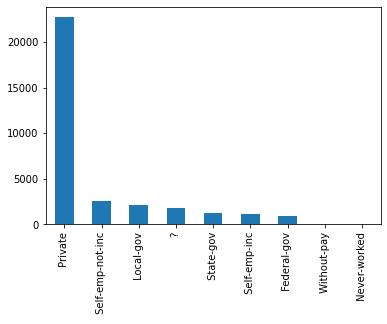

In [11]:
# g = df[names[-1]].value_counts()
g = df[names[1]].value_counts()
g.plot.bar()

In [12]:
types = df.dtypes
print(types)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
50K               object
dtype: object


In [13]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
a = ['lan','lan','hung','diep']
le.fit_transform(a)
b = le.transform(a)
print(b)

[2 2 1 0]


In [14]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])

In [15]:
data = df.values
print(data[:2])

[[   39     7 77516     9    13     4     1     1     4     1  2174     0
     40    39     0]
 [   50     6 83311     9    13     2     4     0     4     1     0     0
     13    39     0]]


In [16]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.30136986 0.875      0.0443019  0.6        0.8        0.66666667
 0.07142857 0.2        1.         1.         0.02174022 0.
 0.39795918 0.95121951]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42,
                                                    test_size=0.25)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=8)
kNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [26]:
# prediction 
y_predict = kNN.predict(X_test)

In [32]:
error = 0
for i in range(len(X_test)):
  # print(y_test[i],y_predict[i])
  if y_test[i] != y_predict[i]:
    error += 1
print("ERROR =", error)

ERROR = 1377
